In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import logging
import requests
import datetime as dt
import pylab

import scipy.stats as stats
from matplotlib import pyplot

import numpy as np

import warnings
warnings.filterwarnings('ignore')

logging.getLogger().setLevel(logging.INFO)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os, sys

In [2]:
home = os.environ["HOME"]
sys.path.append(f"{home}/Desktop/project-ursa/lib")

import imp

In [3]:
import data_utils
import monte_carlo
import mining_constants

In [4]:
import crypto_compare
imp.reload(crypto_compare)

cc_key = "bcf82a146731f8d724b749025e5e368234aa3e428d31d5c4c6aa5bfa7ddf6e9c"

ccu = crypto_compare.cc_utility(cc_key)

cc_hourly_df = ccu.cc_hourly(
    base_sym="BTC", 
    quote_sym="USD", 
    start_dt=datetime.datetime(2020, 1, 1), 
    end_dt=datetime.datetime.now() #datetime.datetime(2021, 1, 1)
)

cc_daily_df = ccu.cc_daily(
    base_sym="BTC", 
    quote_sym="USD", 
    start_dt=datetime.datetime(2020, 1, 1), 
    end_dt=datetime.datetime.now() #datetime.datetime(2021, 1, 1)
)

cc_monthy_df = ccu.cc_monthly(
    base_sym="BTC", 
    quote_sym="USD", 
    start_dt=datetime.datetime(2020, 1, 1), 
    end_dt=datetime.datetime.now() #(2021, 1, 1)
)

cc_rt = ccu.cc_spot(base_sym="BTC", quote_sym="USD")
print(cc_rt)

INFO:root:url - https://min-api.cryptocompare.com/data/v2/histohour?fsym=BTC&tsym=USD&limit=2000&api_key=bcf82a146731f8d724b749025e5e368234aa3e428d31d5c4c6aa5bfa7ddf6e9c&toTs=1683153130
INFO:root:url - https://min-api.cryptocompare.com/data/v2/histohour?fsym=BTC&tsym=USD&limit=2000&api_key=bcf82a146731f8d724b749025e5e368234aa3e428d31d5c4c6aa5bfa7ddf6e9c&toTs=1675951200
INFO:root:url - https://min-api.cryptocompare.com/data/v2/histohour?fsym=BTC&tsym=USD&limit=2000&api_key=bcf82a146731f8d724b749025e5e368234aa3e428d31d5c4c6aa5bfa7ddf6e9c&toTs=1668751200
INFO:root:url - https://min-api.cryptocompare.com/data/v2/histohour?fsym=BTC&tsym=USD&limit=2000&api_key=bcf82a146731f8d724b749025e5e368234aa3e428d31d5c4c6aa5bfa7ddf6e9c&toTs=1661551200
INFO:root:url - https://min-api.cryptocompare.com/data/v2/histohour?fsym=BTC&tsym=USD&limit=2000&api_key=bcf82a146731f8d724b749025e5e368234aa3e428d31d5c4c6aa5bfa7ddf6e9c&toTs=1654351200
INFO:root:url - https://min-api.cryptocompare.com/data/v2/histohour?fs

{'USD': 29181.84}


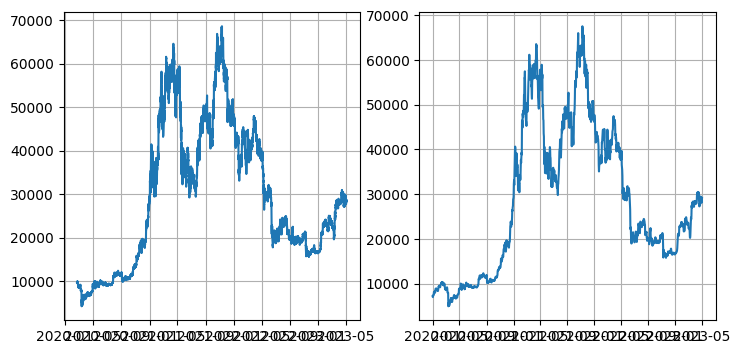

In [5]:
plt.figure(figsize=(13, 4))

plt.subplot(1, 3, 1)
plt.plot(cc_hourly_df.time, cc_hourly_df.close)
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(cc_daily_df.time, cc_daily_df.close)
plt.grid()


In [6]:
import data_utils
imp.reload(data_utils)

# cc_key = "bcf82a146731f8d724b749025e5e368234aa3e428d31d5c4c6aa5bfa7ddf6e9c"
# du = data_utils.DataUtility(cc_key)
# 
# du.generate_weekly_df()
# du.generate_weekly_machine_price_df("../data/machine_prices.csv",  HR_ROLLING_AVG=30)
# 
# du._raw_network_price_df.to_csv("../data/raw_network_price.csv")
# du._daily_network_price_df.to_csv("../data/daily_network_price.csv")
# du._weekly_network_price_df.to_csv("../data/weekly_network_price.csv")
# du._weekly_machine_price_df.to_csv("../data/weekly_machine_price.csv")

<module 'data_utils' from '/Users/merkle-employee/Desktop/project-ursa/lib/data_utils.py'>

In [7]:
datetime.datetime.now().date()

datetime.date(2023, 5, 3)

In [8]:
import pandas
import data_utils

du = data_utils.DataUtility(cc_key)

du._raw_network_price_df = pandas.read_csv("../../data/raw_network_price.csv").drop("Unnamed: 0", axis="columns")
du._raw_network_price_df.time = pd.to_datetime(du._raw_network_price_df.time)
du._df_feature() 
du._aggregate_weekly_df() 
weekly_df = du._weekly_network_price_df
weekly_df.head()

,hashrate,close,reward,day_count,hash_index,hash_index_return,hash_index_return_log,hash_index_diff,price_returns_log,price_returns,hashrate_returns_log,hashrate_returns
time,,,,,,,,,,,,
2017-11-03,9.903332e+06,6480.622857,12600.0,7,1.177899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-10,1.018162e+07,7136.440000,12600.0,7,1.261645,0.071098,0.068684,0.083746,0.096397,0.101197,0.027713,0.028101
2017-11-17,8.783834e+06,6882.050000,12600.0,7,1.410283,0.117813,0.111374,0.148638,-0.036297,-0.035647,-0.147671,-0.137285
2017-11-24,1.074329e+07,8088.138571,12600.0,7,1.355138,-0.039102,-0.039887,-0.055144,0.161482,0.175251,0.201369,0.223076
2017-12-01,1.110374e+07,9765.491429,12600.0,7,1.583060,0.168191,0.155456,0.227922,0.188456,0.207384,0.033000,0.033551


In [9]:
# import pandas
# import data_utils
# 
# imp.reload(data_utils)
# 
# du = data_utils.DataUtility("")
# du._raw_network_price_df = pandas.read_csv("../../data/raw_network_price.csv").drop("Unnamed: 0", axis="columns")
# du._raw_network_price_df.time = pd.to_datetime(du._raw_network_price_df.time)
# du._df_feature() 
# 
# machine_prices = data_utils.machine_market_prices("../../data/machine_prices.csv")
# du._weekly_machine_price_df = du._join_machine_price(machine_prices, HR_ROLLING_AVG=30)
# 
# assert du._weekly_machine_price_df.sum().sum() == 20878967243.593388
# 
# assert du._weekly_machine_price_df.sum().sum() == 20878967243.593388
# plt.figure()
# plt.plot(du._weekly_machine_price_df.close)
# plt.plot(du._weekly_machine_price_df.S19J)

In [10]:
daily_df  = du._daily_network_price_df
weekly_df = du._weekly_network_price_df

sp = monte_carlo.GBMPriceLinearHashRate()
sp.fit(weekly_df, sample_rate=mining_constants.SAMPLE_RATE_WEEKLY)

sp._gbm_params == {'mu': 0.005344673686849799, 'sigma': 0.0873135992840332}
sp._gbm_params

{'mu': 0.005344673686849799, 'sigma': 0.0873135992840332}

In [11]:
k = len(weekly_df) - 1

week_start = weekly_df.reset_index().loc[k, "time"]
hash_rate  = weekly_df.reset_index().loc[k, "hashrate"]
hash_index = weekly_df.reset_index().loc[k, "hash_index"]
btc_close  = weekly_df.reset_index().loc[k, "close"]

print("week: ", week_start, "hashrate: ", hash_rate, "hash-index: ", hash_index, "btc-close: ", btc_close)

week:  2023-04-14 hashrate:  346035351.07423794 hash-index:  0.07690399113505421 btc-close:  29568.332857142854


In [12]:
##
sp = monte_carlo.GBMPriceLinearHashRate()
sp.fit(weekly_df, sample_rate=mining_constants.SAMPLE_RATE_WEEKLY)

import monte_carlo
imp.reload(monte_carlo)

sp = monte_carlo.GBMPriceLinearHashRate()
sp.fit(weekly_df, sample_rate=mining_constants.SAMPLE_RATE_WEEKLY)

# gg._gbm_params == {'mu': 0.005344673686849799, 'sigma': 0.0873135992840332}
# gg._lm.params[1]

In [13]:
k = len(weekly_df) - 1

week_start = weekly_df.reset_index().loc[k, "time"]
hash_rate  = weekly_df.reset_index().loc[k, "hashrate"]
hash_index = weekly_df.reset_index().loc[k, "hash_index"]
btc_close  = weekly_df.reset_index().loc[k, "close"]

print("week: ", week_start, "hashrate: ", hash_rate, "hash-index: ", hash_index, "btc-close: ", btc_close)

week:  2023-04-14 hashrate:  346035351.07423794 hash-index:  0.07690399113505421 btc-close:  29568.332857142854


In [14]:
imp.reload(monte_carlo)

sp = monte_carlo.GBMPriceLinearHashRate()
sp.fit(weekly_df, sample_rate=mining_constants.SAMPLE_RATE_WEEKLY)

(int(sp._lm.params[0]) == 60684392) & (int(sp._lm.params[1]) == 55942997)

True

In [15]:
k = len(weekly_df) - 1

week_start = weekly_df.reset_index().loc[k, "time"]
hash_rate  = weekly_df.reset_index().loc[k, "hashrate"]
hash_index = weekly_df.reset_index().loc[k, "hash_index"]
btc_close  = weekly_df.reset_index().loc[k, "close"]

print("week: ", week_start, "hashrate: ", hash_rate, "hash-index: ", hash_index, "btc-close: ", btc_close)

week:  2023-04-14 hashrate:  346035351.07423794 hash-index:  0.07690399113505421 btc-close:  29568.332857142854


In [16]:
imp.reload(monte_carlo)

sp = monte_carlo.GBMPriceLinearHashRate()
sp.fit(weekly_df, sample_rate=mining_constants.SAMPLE_RATE_WEEKLY)

In [17]:
ttm_vec, ttm_dt_vec, St, HRt, wt, Ht = sp.simulate(
    start_time    = week_start,
    spot_init     = btc_close,
    hashrate_init = hash_rate,
    sample_rate   = mining_constants.SAMPLE_RATE_WEEKLY,
    N = 100,
    T = 2
)

INFO:root:simulate: T = 2 sample_rate = 52 => steps = 104 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  104


In [18]:
St.shape

(104, 100)

In [19]:
# daily_df.head()
# 
# fig = plt.figure(figsize=(8, 4))
# ax = fig.add_subplot(111)
# 
# ax.plot(daily_df.hashrate.fillna("ffill").rolling(30).mean(), label="Hash Rate")
# ax.set_xlabel("Time")
# ax.set_ylabel("network hashrate (TH/s)")
# ax.grid()
# ax1 = ax.twinx()
# ax1.plot(
#     daily_df.difficulty.replace(0, np.nan).fillna(method="ffill").rolling(5).median(), 
#     color="green"
# )
# ax1.set_ylabel("network difficulty")
# ax.legend()
# ax1.legend()
# plt.show()
# 
# ols_time      = sp._lm_data["x"][:, 1]
# ols_true_hr   = sp._lm_data["y"]
# ols_fitted_hr = sp._lm.fittedvalues
# offset        = ols_fitted_hr[0] - ols_true_hr[0]
# 
# plt.figure(figsize=(8, 4))
# plt.plot(2017.55 + ols_time, ols_fitted_hr - offset, label="OLS Fitted historical hashrate")
# plt.plot(2017.55 + ols_time, ols_true_hr, label="OLS true hashrate")
# plt.ylabel("network hashrate")
# plt.xlabel("time")
# plt.legend()
# plt.grid()

In [20]:
# import bsm_utils
# 
# # Spot Checked against: http://www.option-price.com/index.php
# # c_price = bsm_utils.bsm_call_price(sigma=0.5, S=10, K=10, r=0.02, T=1)
# # p_price = bsm_utils.bsm_put_price(sigma=0.5, S=10, K=10, r=0.02, T=1)
# 
# 
# c_delta = bsm_utils.bsm_delta(sigma=0.5, S=10, K=10, r=0.02, T=1, contract_type=bsm_utils.CONTRACT_CALL_OPTION)
# p_delta = bsm_utils.bsm_delta(sigma=0.5, S=10, K=10, r=0.02, T=1, contract_type=bsm_utils.CONTRACT_PUT_OPTION)
# 
# # print(c_price, p_price, c_delta, p_delta)

In [21]:
import mining_constants
imp.reload(mining_constants)

import bsm_utils
imp.reload(bsm_utils)

sigma = 0.5
S     = 10
K     = 10
T     = 1
P_t   = S * np.ones((5, 10))
IV_t  = sigma * np.ones((5, 10))
fh    = bsm_utils.bsm_delta
K_vec = K * np.ones((1, 10))
t_vec = np.linspace(0, T, 5)
r     = 0.03

D_t = bsm_utils.compute_option_greek(fh, P_t, IV_t, t_vec, K_vec, T, r, ctype = mining_constants.CONTRACT_CALL_OPTION, n_process=8)
d1  = bsm_utils.bsm_delta(sigma, S, K, T - t_vec, r, mining_constants.CONTRACT_CALL_OPTION)

d2 = D_t[:, 0]

assert (d1[~np.isnan(d1)] == d2[~np.isnan(d2)]).sum() == 4

/Users/merkle-employee/Desktop/project-ursa/lib/bsm_utils.py:18: RuntimeWarning: invalid value encountered in divide
  d1 = (np.log(S / K) + (r + (sigma**2) / 2) * T) / (sigma * np.sqrt(T))


In [22]:
assert (d1[~np.isnan(d1)] == d2[~np.isnan(d2)]).sum() == 4

In [23]:
d2

array([0.62171952, 0.6058304 , 0.58675408, 0.56158934,        nan])